<a href="https://colab.research.google.com/github/sarahrandolphw/edu4VA/blob/main/gaming_and_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Code to download the dataset from kaggle to the notebook
# Need to download kaggle.json on kaggle settings, then upload in files your kaggle.json file


In [4]:
import os
import shutil

kaggle_dir = os.path.join(os.path.expanduser("~"), ".kaggle")
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
shutil.move('kaggle.json', os.path.join(kaggle_dir, 'kaggle.json'))
os.chmod(os.path.join(kaggle_dir, 'kaggle.json'), 0o600)


In [5]:
import os
import zipfile

data_link = "learnplatform-covid19-impact-on-digital-learning"
data_folder = "learning_data"

if not os.path.exists(data_folder):
    os.makedirs(data_folder)

!kaggle competitions download -c {data_link} -p {data_folder}

for file in os.listdir(data_folder):
    if file.endswith('.zip'):
        zip_path = os.path.join(data_folder, file)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_folder)
        os.remove(zip_path)
print("Dataset downloaded and extracted to", data_folder)

data_files = os.listdir(data_folder)
print("Extracted files:", data_files)


 97% 120M/124M [00:01<00:00, 139MB/s] 
100% 124M/124M [00:01<00:00, 90.1MB/s]
Dataset downloaded and extracted to learning_data
Extracted files: ['README.md', 'products_info.csv', 'engagement_data', 'districts_info.csv']


In [6]:
import pandas as pd

districts_path = os.path.join(data_folder, 'districts_info.csv')
districts_info_df = pd.read_csv(districts_path)
districts_info_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [7]:
products_path = os.path.join(data_folder, 'products_info.csv')
products_info_df = pd.read_csv(products_path)
products_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [8]:
engagements_path = os.path.join(data_folder, 'engagement_data')
for filename in os.listdir(engagements_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(engagements_path, filename)

        new_data = pd.read_csv(file_path)

        if 'lp_id' in new_data.columns:
          products_merged_df = pd.merge(products_info_df, new_data, left_on='LP ID', right_on='lp_id', how='left')

products_merged_df.drop('lp_id', axis=1, inplace=True)
products_merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7774 entries, 0 to 7773
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LP ID                       7774 non-null   int64  
 1   URL                         7774 non-null   object 
 2   Product Name                7774 non-null   object 
 3   Provider/Company Name       7773 non-null   object 
 4   Sector(s)                   7507 non-null   object 
 5   Primary Essential Function  7507 non-null   object 
 6   time                        7645 non-null   object 
 7   pct_access                  7645 non-null   float64
 8   engagement_index            6396 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 546.7+ KB


In [9]:
products_merged_df['engagement_index'].value_counts()

,count
engagement_index,
5.73,132
2.67,108
2.58,107
5.83,103
2.87,98
...,...
4930.59,1
1618.56,1
463.92,1


<Axes: xlabel='time', ylabel='engagement_index'>

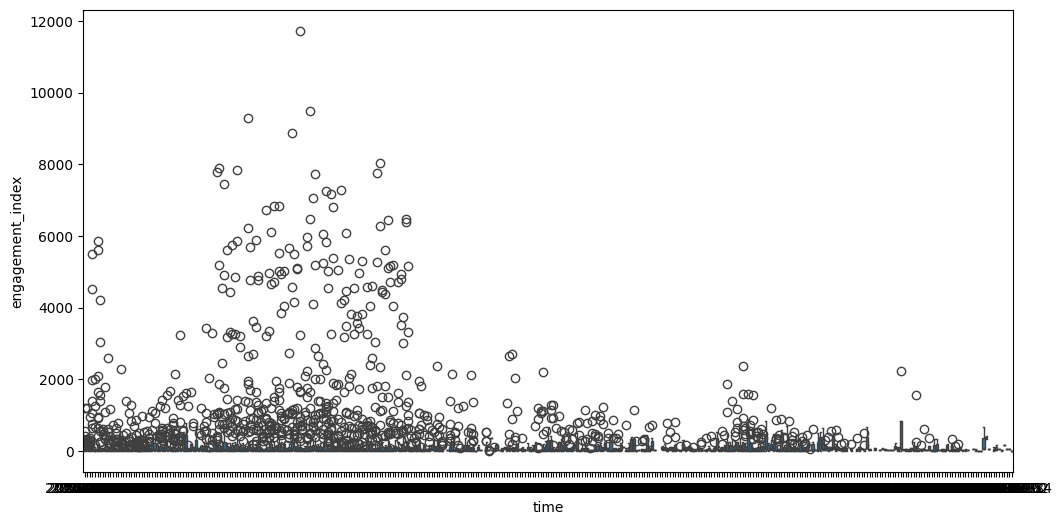

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=products_merged_df, x='time', y='engagement_index')

In [4]:
"""
what this code is supposed to do:
merges three datasets to create a comprehensive data frame
that combines information about school districts, educational products, and their usage
"""

import os
import pandas as pd

# define paths
data_folder = "learning_data"
districts_path = os.path.join(data_folder, 'districts_info.csv')
products_path = os.path.join(data_folder, 'products_info.csv')
engagements_path = os.path.join(data_folder, 'engagement_data')

# load data
districts_df = pd.read_csv(districts_path)
products_df = pd.read_csv(products_path)

# ensure consistent data types for merging
districts_df['district_id'] = districts_df['district_id'].astype(str)

# process engagement data
engagement_list = []
for file in os.listdir(engagements_path):
    if file.endswith('.csv'):
        district_id = file.split('.')[0]  # extract district_id from filename
        engagement_df = pd.read_csv(os.path.join(engagements_path, file))
        engagement_df['district_id'] = district_id  # add district_id
        engagement_list.append(engagement_df)

# combine all engagement files
engagement_df = pd.concat(engagement_list, ignore_index=True)
engagement_df['district_id'] = engagement_df['district_id'].astype(str)

# merge products with engagement data
products_engagement_df = pd.merge(
    products_df,
    engagement_df,
    left_on='LP ID',
    right_on='lp_id',
    how='inner'
)

# merge districts with the combined data
final_df = pd.merge(
    districts_df,
    products_engagement_df,
    on='district_id',
    how='inner'
)

# display the final DataFrame information
print(final_df.info())
print(final_df.head())

# save to a CSV file
final_df.to_csv(os.path.join(data_folder, 'merged_data.csv'), index=False)
print("Merged data saved to 'merged_data.csv'")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11691587 entries, 0 to 11691586
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   district_id                 object 
 1   state                       object 
 2   locale                      object 
 3   pct_black/hispanic          object 
 4   pct_free/reduced            object 
 5   county_connections_ratio    object 
 6   pp_total_raw                object 
 7   LP ID                       int64  
 8   URL                         object 
 9   Product Name                object 
 10  Provider/Company Name       object 
 11  Sector(s)                   object 
 12  Primary Essential Function  object 
 13  time                        object 
 14  lp_id                       float64
 15  pct_access                  float64
 16  engagement_index            float64
dtypes: float64(3), int64(1), object(13)
memory usage: 1.5+ GB
None
  district_id     state  locale pct_bl